In [1]:
%pylab inline
import cv2
import numpy as np
import dicom
import pandas as pd

/home/lishen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


# Load some data for exploration

In [2]:
img_001 = cv2.imread('referenceData/MIAS/raw_data/mdb001.pgm', cv2.IMREAD_UNCHANGED)
print img_001.shape
print img_001.dtype

(1024, 1024)
uint8


In [3]:
print img_001.mean()
print img_001.std()
print img_001.max()
print img_001.min()

36.5348396301
63.4198780802
221
0


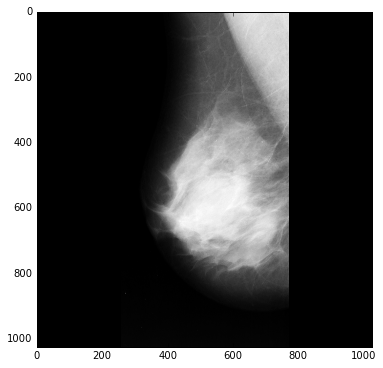

In [4]:
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(img_001, cmap='gray')

In [5]:
img_info_df = pd.read_csv('referenceData/MIAS/raw_data/mammogram_info.csv', sep=" ")
img_info_df.head()

,Reference,Bkg,Class,Sever,X,Y,Rad
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0


In [6]:
img_malign_df = img_info_df.loc[img_info_df['Sever'] == 'M']
print img_malign_df.shape
img_malign_df.head()

(54, 7)


,Reference,Bkg,Class,Sever,X,Y,Rad
23,mdb023,G,CIRC,M,538,681,29.0
28,mdb028,F,CIRC,M,338,314,56.0
58,mdb058,D,MISC,M,318,359,27.0
72,mdb072,G,ASYM,M,266,517,28.0
75,mdb075,F,ASYM,M,468,717,23.0


In [7]:
img_info_df['Rad'].describe()

/home/lishen/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    119.000000
mean      48.848739
std       33.558863
min        3.000000
25%             NaN
50%             NaN
75%             NaN
max      197.000000
Name: Rad, dtype: float64

In [8]:
img_malign_df['Rad'].describe()

count     51.000000
mean      56.705882
std       32.435964
min       13.000000
25%             NaN
50%             NaN
75%             NaN
max      174.000000
Name: Rad, dtype: float64

In [9]:
img_info_df['Bkg'].describe()

count     330
unique      3
top         D
freq      117
Name: Bkg, dtype: object

# Draw ROI

In [10]:
img_info_df_indexed = img_info_df.set_index('Reference')
img_info_df_indexed.head()

,Bkg,Class,Sever,X,Y,Rad
Reference,,,,,,
mdb001,G,CIRC,B,535,425,197.0
mdb002,G,CIRC,B,522,280,69.0
mdb003,D,NORM,NaN,NaN,NaN,NaN
mdb004,D,NORM,NaN,NaN,NaN,NaN
mdb005,F,CIRC,B,477,133,30.0


In [11]:
img_001_info = img_info_df_indexed.loc['mdb001']
img_001_info

Bkg         G
Class    CIRC
Sever       B
X         535
Y         425
Rad       197
Name: mdb001, dtype: object

In [12]:
x1 = int(img_001_info['X']) - int(img_001_info['Rad'])
y1 = 1024 - int(img_001_info['Y']) - int(img_001_info['Rad'])
x2 = int(img_001_info['X']) + int(img_001_info['Rad'])
y2 = 1024 - int(img_001_info['Y']) + int(img_001_info['Rad'])
print x1, y1
print x2, y2

338 402
732 796


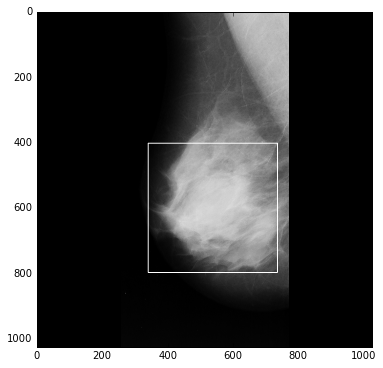

In [13]:
# cv2.imshow(img_001)
img_001_rect = cv2.rectangle(img_001, (x1, y1), (x2, y2), (255,255,255), 2)
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(img_001_rect, cmap='gray')

In [14]:
rad = img_info_df_indexed['Rad'].copy()
rad.sort_values(ascending=True).head(10)

Reference
mdb212     3.0
mdb223     6.0
mdb226     7.0
mdb218     8.0
mdb226     8.0
mdb227     9.0
mdb248    10.0
mdb214    11.0
mdb211    13.0
mdb236    14.0
Name: Rad, dtype: float64

In [15]:
rad = img_info_df_indexed['Rad'].copy()
rad.sort_values(ascending=False).head(10)

Reference
mdb001    197.0
mdb148    174.0
mdb193    132.0
mdb081    131.0
mdb274    123.0
mdb115    117.0
mdb184    114.0
mdb107    111.0
mdb111    107.0
mdb105     98.0
Name: Rad, dtype: float64

In [16]:
print sum(img_info_df_indexed['Class'] == 'NORM')
print sum(img_info_df_indexed['Class'] != 'NORM')

207
123


In [17]:
def show_roi(ref, folder, df, r=None, n=0):
    from os import path
    img = cv2.imread(path.join(folder, ref + '.pgm'), cv2.IMREAD_UNCHANGED)
    info = df.loc[ref]
    try:
        xc = int(info['X'])
        yc = int(info['Y'])
        if r is None:
            r = int(info['Rad'])
    except TypeError:
        xc = int(info['X'].iloc[n])
        yc = int(info['Y'].iloc[n])
        if r is None:
            r = int(info['Rad'].iloc[n])
    x1 = xc - r
    y1 = 1024 - yc - r
    x2 = xc + r
    y2 = 1024 - yc + r
    
    img_roi = cv2.rectangle(img, (x1, y1), (x2, y2), (255,255,255), 2)
    fig,ax = subplots()
    fig.set_size_inches([9, 9])
    ax.imshow(img_roi, cmap='gray')

In [18]:
int(img_info_df_indexed.loc['mdb144']['X'].iloc[0])

233

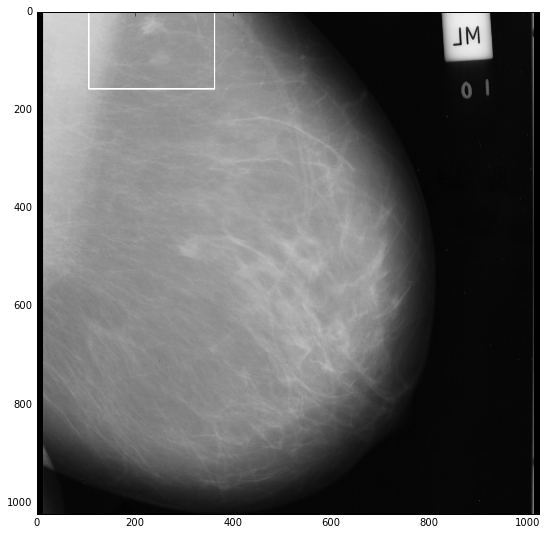

In [19]:
show_roi('mdb144', 'referenceData/MIAS/raw_data/', img_info_df_indexed, 128, n=0)

In [99]:
from os import path
rs = 128  # ROI radius size.
roi_cnt = 0
outdir = 'referenceData/MIAS/roi'

def clip(v, minv=0, maxv=1024):
    v = minv if v < minv else v
    v = maxv if v > maxv else v
    return v
    
for ref, info in img_info_df_indexed.iterrows():
    try:
        xc = int(info['X'])
        yc = int(info['Y'])
        r = int(info['Rad'])
    except ValueError:
        continue
    img = cv2.imread(path.join('referenceData/MIAS/raw_data/', ref + '.pgm'), cv2.IMREAD_UNCHANGED)
    if r <= rs:
        x = xc - rs
        x = clip(x)
        y = 1024 - yc - rs
        y = clip(y)
        roi = img[y:y+rs*2, x:x+rs*2]
        patch = np.zeros((rs*2, rs*2))
        patch[0:roi.shape[0], 0:roi.shape[1]] = roi
        fn = "%s_roi%04d.png" % (ref, roi_cnt)
        cv2.imwrite(path.join(outdir, fn), patch, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        roi_cnt += 1
    else:
        # When the ROI radius is larger than 128, 
        # extract all 9 patches that are centered 
        # around the ROI center.
        xss = [-r, -rs, r-2*rs]
        yss = [-r, -rs, r-2*rs]
        for xs in xss:
            for ys in yss:
                x = xc + xs
                x = clip(x)
                y = 1024 - yc + ys
                y = clip(y)
                roi = img[y:y+rs*2, x:x+rs*2]
                patch = np.zeros((rs*2, rs*2))
                patch[0:roi.shape[0], 0:roi.shape[1]] = roi
                fn = "%s_roi%04d.png" % (ref, roi_cnt)
                cv2.imwrite(path.join(outdir, fn), patch, [cv2.IMWRITE_PNG_COMPRESSION, 0])
                roi_cnt += 1
print roi_cnt

151


## Show the 9 patches for a large ROI

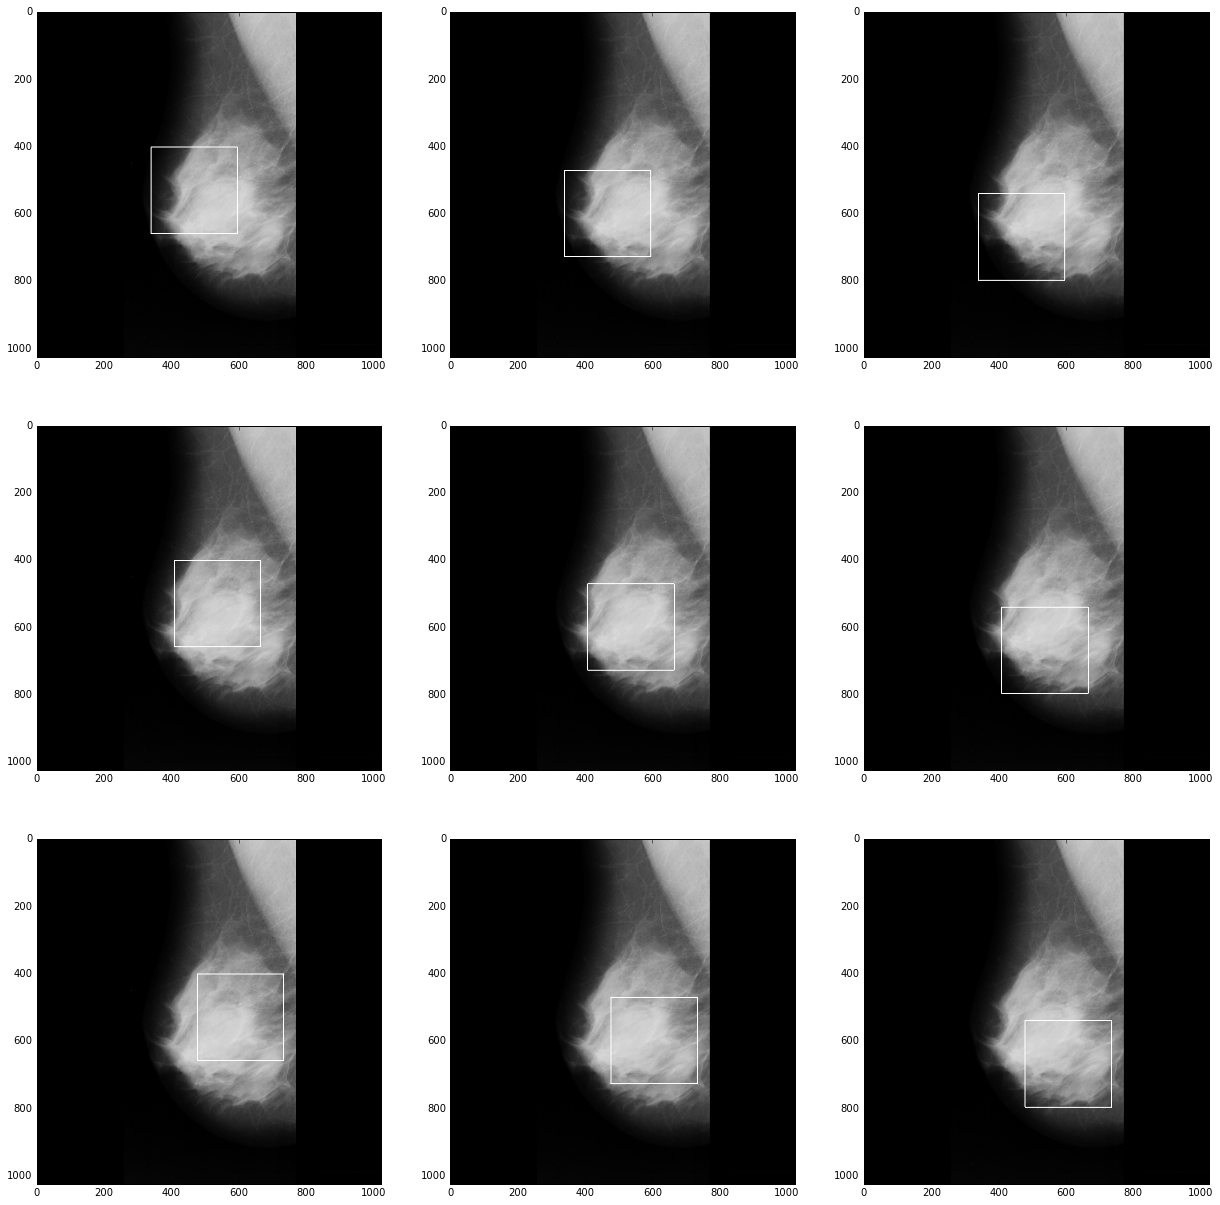

In [21]:
from os import path

fig,axes = subplots(3, 3)
fig.set_size_inches([21, 21])
rs = 128  # ROI radius size.
info = img_info_df_indexed.loc['mdb001']
try:
    xc = int(info['X'])
    yc = int(info['Y'])
    r = int(info['Rad'])
except ValueError:
    pass
img = cv2.imread(path.join('referenceData/MIAS/raw_data/', 'mdb001' + '.pgm'), cv2.IMREAD_UNCHANGED)
xss = [-r, -rs, r-2*rs]
yss = [-r, -rs, r-2*rs]
for i, xs in enumerate(xss):
    for j, ys in enumerate(yss):
        x = xc + xs
        y = 1024 - yc + ys
        img_roi = cv2.rectangle(img.copy(), (x, y), (x+2*rs, y+2*rs), (255,255,255), 2)
        axes[i, j].imshow(img_roi, cmap='gray')

# Use finding contours for breast segmentation

In [22]:
img_norm = cv2.imread('referenceData/MIAS/raw_data/mdb003.pgm', cv2.IMREAD_UNCHANGED)
ret,th = cv2.threshold(img_norm, 13, 255, cv2.THRESH_BINARY)

In [23]:
th_, contours, hierarchy = cv2.findContours(th.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

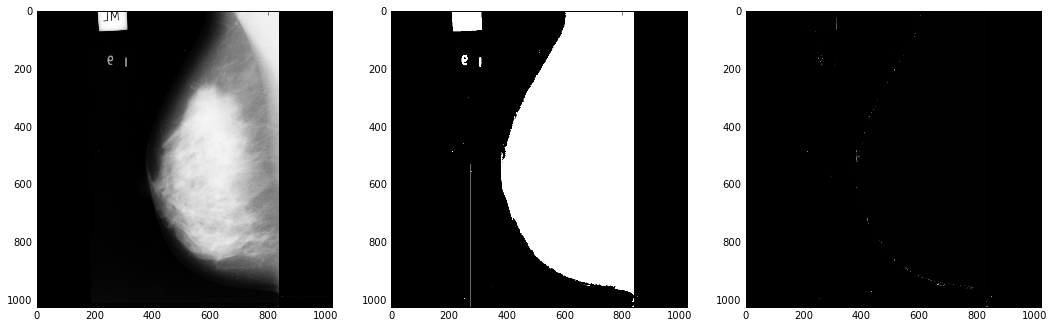

In [24]:
fig,axes = subplots(1, 3)
fig.set_size_inches([18, 6])
axes[0].imshow(img_norm, cmap='gray')
axes[1].imshow(th, cmap='gray')
axes[2].imshow(th_, cmap='gray')

In [25]:
cont_areas = [cv2.contourArea(c_) for c_ in contours]
np.argmax(cont_areas)

60

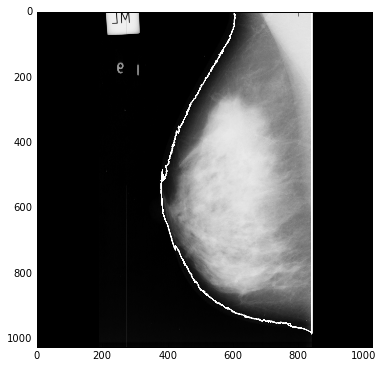

In [26]:
cont = cv2.drawContours(img_norm.copy(), contours, 60, (255,255,255), 3)
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(cont, cmap='gray')

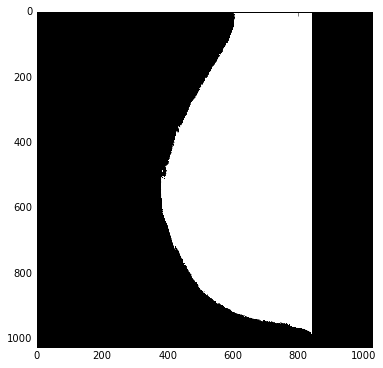

In [27]:
breast_mask = cv2.drawContours(np.zeros_like(th), contours, 60, 255, cv2.FILLED)
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(breast_mask, cmap='gray')

In [28]:
cv2.boundingRect(contours[60])

(378, 1, 460, 983)

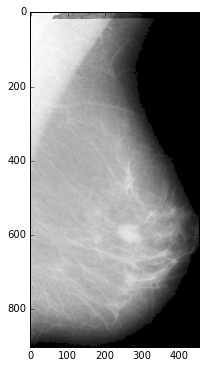

In [2]:
from dm_preprocess import DMImagePreprocessor as prep
img = cv2.imread('referenceData/MIAS/raw_data/mdb010.pgm', cv2.IMREAD_UNCHANGED)
img_breast = prep.segment_breast(img, .1)
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(img_breast, cmap='gray')

Using TensorFlow backend.


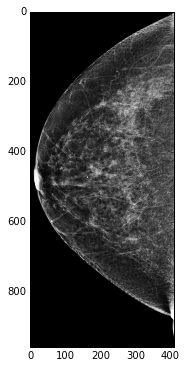

In [3]:
from dm_preprocess import DMImagePreprocessor as prep
from dm_image import read_resize_img
img = read_resize_img('trainingData/000135.dcm', target_height=1024, target_scale=4095)
img_breast = prep.segment_breast(img, .05)
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(img_breast, cmap='gray')

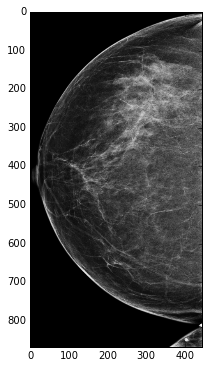

In [4]:
from dm_preprocess import DMImagePreprocessor as prep
from dm_image import read_resize_img
img = read_resize_img('trainingData/430458.dcm', target_height=1024, target_scale=4095)
img_breast = prep.segment_breast(img, .05)
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(img_breast, cmap='gray')

# Use blob detection to generate candidate ROIs

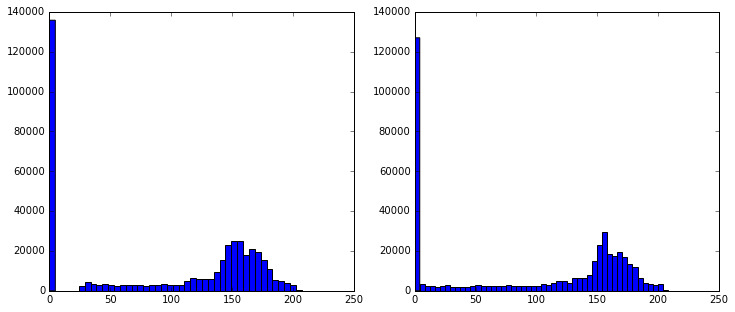

In [3]:
img_breast_blur = cv2.GaussianBlur(img_breast.copy(), (41, 41), 0)
fig,axes = subplots(1, 2)
fig.set_size_inches([12, 5])
_ = axes[0].hist(img_breast.ravel(), 50)
_ = axes[1].hist(img_breast_blur.ravel(), 50)

In [4]:
ret,th = cv2.threshold(img_breast, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print ret

81.0


tried to use Otsu thresholding to identify a cutoff automatically but it didn't seem to work.

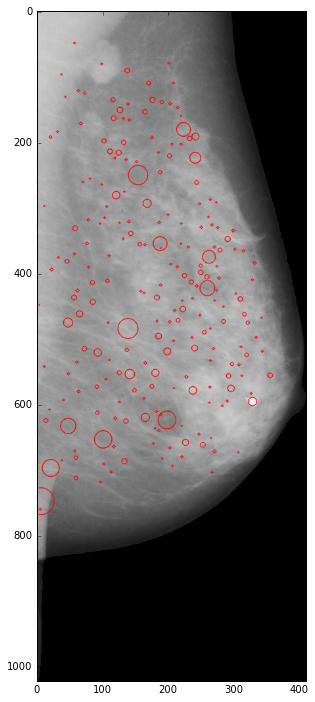

In [5]:
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 3
params.maxArea = 256**2
params.filterByCircularity = False
params.filterByColor = False
params.filterByConvexity = False
params.filterByInertia = False
params.minThreshold = 125
params.maxThreshold = 220
params.thresholdStep = 10
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(img_breast)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle 
# corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(
    img_breast.copy(), keypoints, np.array([]), 255, 
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig,axes = subplots(1, 1)
fig.set_size_inches([8, 12])
#axes[0].imshow(img_breast, cmap='gray')
axes.imshow(im_with_keypoints, cmap='gray')

In [7]:
print len(keypoints)

219


In [8]:
kp = keypoints[0]
print kp.pt
print kp.size

(96.25, 718.25)
3.0


## Use blob detection to generate background image patches

In [107]:
from os import path
from dm_preprocess import DMImagePreprocessor as IMP
from numpy.random import RandomState

rng = RandomState(12345)
rs = 128  # ROI radius size.
bkg_cnt = 0
outdir = 'referenceData/MIAS/bkg'
low_th = .1
roi_th = .5
nb_sample = 16

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 3
params.maxArea = (rs*2)**2
params.filterByCircularity = False
params.filterByColor = False
params.filterByConvexity = False
params.filterByInertia = False
params.minThreshold = int(roi_th*255)
params.maxThreshold = 220
params.thresholdStep = 10
detector = cv2.SimpleBlobDetector_create(params)

def clip(v, minv=0, maxv=1024):
    v = minv if v < minv else v
    v = maxv if v > maxv else v
    return v
    
for ref, info in img_info_df_indexed.iterrows():
    is_norm = info['Class'] == 'NORM'
    if not is_norm:
        continue
    img = cv2.imread(path.join('referenceData/MIAS', ref + '.pgm'), cv2.IMREAD_UNCHANGED)
    img = IMP.segment_breast(img, low_th)
    # Detect blobs.
    keypoints = detector.detect(img)
    if len(keypoints) > nb_sample:
        keypoints = rng.choice(keypoints, nb_sample, replace=False)
    for kp in keypoints:
        xc, yc = kp.pt
        x = xc - rs
        x = clip(x)
        y = yc - rs
        y = clip(y)
        roi = img[y:y+rs*2, x:x+rs*2]
        patch = np.zeros((rs*2, rs*2))
        patch[0:roi.shape[0], 0:roi.shape[1]] = roi
        fn = "%s_bkg%04d.png" % (ref, bkg_cnt)
        cv2.imwrite(path.join(outdir, fn), patch, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        bkg_cnt += 1
print bkg_cnt

/Users/lishen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


3312
